In [1]:
from fastai.vision.all import *

In [2]:
Path.BASE_PATH = path = Path('../')/'paddy'
trn_path = path/'train_images'

In [3]:
path.ls()

(#5) [Path('sample_submission.csv'),Path('test_images'),Path('train_images'),Path('train.csv'),Path('paddy-disease-classification.zip')]

In [4]:
trn_path.ls()

(#10) [Path('train_images/bacterial_panicle_blight'),Path('train_images/dead_heart'),Path('train_images/tungro'),Path('train_images/hispa'),Path('train_images/normal'),Path('train_images/bacterial_leaf_streak'),Path('train_images/brown_spot'),Path('train_images/bacterial_leaf_blight'),Path('train_images/downy_mildew'),Path('train_images/blast')]

In [5]:
blb = trn_path/'bacterial_leaf_blight'
blb.ls()

(#479) [Path('train_images/bacterial_leaf_blight/110320.jpg'),Path('train_images/bacterial_leaf_blight/102935.jpg'),Path('train_images/bacterial_leaf_blight/107251.jpg'),Path('train_images/bacterial_leaf_blight/101973.jpg'),Path('train_images/bacterial_leaf_blight/100956.jpg'),Path('train_images/bacterial_leaf_blight/104018.jpg'),Path('train_images/bacterial_leaf_blight/109324.jpg'),Path('train_images/bacterial_leaf_blight/107592.jpg'),Path('train_images/bacterial_leaf_blight/106539.jpg'),Path('train_images/bacterial_leaf_blight/101593.jpg')...]

In [6]:
df = pd.read_csv(path/'train.csv')
df

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


In [7]:
files = get_image_files(trn_path)
files

(#10407) [Path('train_images/bacterial_panicle_blight/109162.jpg'),Path('train_images/bacterial_panicle_blight/109183.jpg'),Path('train_images/bacterial_panicle_blight/101765.jpg'),Path('train_images/bacterial_panicle_blight/101592.jpg'),Path('train_images/bacterial_panicle_blight/104770.jpg'),Path('train_images/bacterial_panicle_blight/110190.jpg'),Path('train_images/bacterial_panicle_blight/106643.jpg'),Path('train_images/bacterial_panicle_blight/104269.jpg'),Path('train_images/bacterial_panicle_blight/108023.jpg'),Path('train_images/bacterial_panicle_blight/107676.jpg')...]

In [8]:
# img = PILImage.create(blb/'100330.jpg')
img = PILImage.create(files[0])

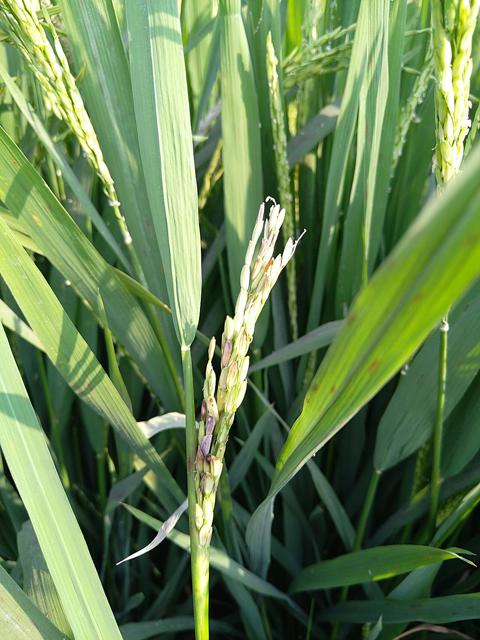

In [9]:
img

In [10]:
[PILImage.create(o).size for o in files[:10] ]

[(480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640)]

In [11]:
df.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [12]:
def is_cat(x): return x[0].isupper()

In [13]:
dls = ImageDataLoaders.from_folder(trn_path,valid_pct=0.2,seed=42,item_tfms=Resize(224))

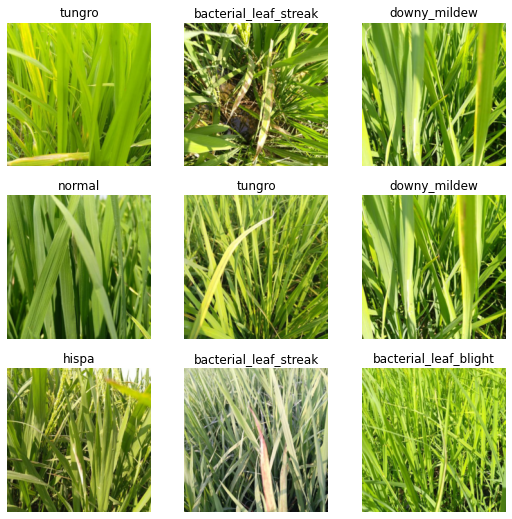

In [14]:
dls.show_batch()

In [15]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.908551,1.025606,0.318116,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.746372,0.431010,0.129745,00:40


In [17]:
# %time sizes = [PILImage.create(o).size for o in files]

CPU times: user 28.8 s, sys: 669 ms, total: 29.5 s
Wall time: 29.5 s


In [18]:
# from fastcore.parallel import *

In [16]:
doc(parallel)

In [17]:
def f(o): return PILImage.create(o).size

In [21]:
# %time sizes = parallel(f, files, n_workers=4)

CPU times: user 4.79 s, sys: 1.02 s, total: 5.81 s
Wall time: 32.8 s


In [22]:
# %time sizes = parallel(f, files, n_workers=8)

CPU times: user 5.01 s, sys: 1.3 s, total: 6.32 s
Wall time: 40.4 s


In [21]:
import huggingface_hub
import timm
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [26]:
learn = vision_learner(dls, 'convnextv2_small', metrics=error_rate, pretrained=False)

In [24]:
timm.__version__

'0.9.2'

In [27]:
# learn.fine_tune??
# vision_learner??


In [28]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.681078,1.884910,0.634791,04:15


epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 74.00 MiB (GPU 0; 15.90 GiB total capacity; 15.07 GiB already allocated; 13.50 MiB free; 15.16 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF